# K Nearest Neighbor
## A movie-ing target

## Friend inventory
### Use handout

![bullseye3](img/bullseye2.png)

## Friend Inventory
### What would each person choose?

![movies](img/movies.png)

## Friend Inventory
### Decision majority by ring

If you just polled the inner ring of people, what movie would you end up seeing?
- How about if you polled the first *and* second ring?
- The first three rings?
- All of it?

Share with your neighbor what movie you'd end up seeing.

## Friend Inventory
### What did you end up seeing?

Who's movie choices changed based on how many people you polled?
![movies](img/movies.png)



## Friend Inventory
### What's the "algorithm" we used for this process, in normal words?

### How does this relate to K nearest neighbor(knn)?

![annotate](img/bullseye-annotate.png)

# Starting Off

We are going to revisit the pima native Americans diabetes dataset. Can we use knn to classify people correctly and then predict if someone will have diabetes?

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## K-nearest neighbors (KNN) classification

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?

### What should the grey point be?

<img src='img/scenario.png' width=500/>

## KNN has the following basic steps:

<img src='img/knn-process.png' width=500/>

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](img/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](img/04_5nn_map.png)

## A bit more math

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



## A bit more math
### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](img/euclidean-distance.png)

## A bit more math
### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](img/vectorgraph.jpg)

## A bit more math
### Euclidean Distance Equation
![alt text](img/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

## Implementing the KNN Classifier with SKlearn

## Reviewing the Pima dataset

## Loading the data


[following this analysis for part of this section](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

The Question creeping out of this summary
- Can minimum value of below listed columns be zero (0)?
- On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')

In [2]:
display(diabetes.head()), diabetes.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None, None)

In [3]:

y = diabetes['Outcome']
X = diabetes.drop(columns=['Outcome'])
diabetes.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
import numpy as np
diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
p = diabetes.hist(figsize = (20,20))

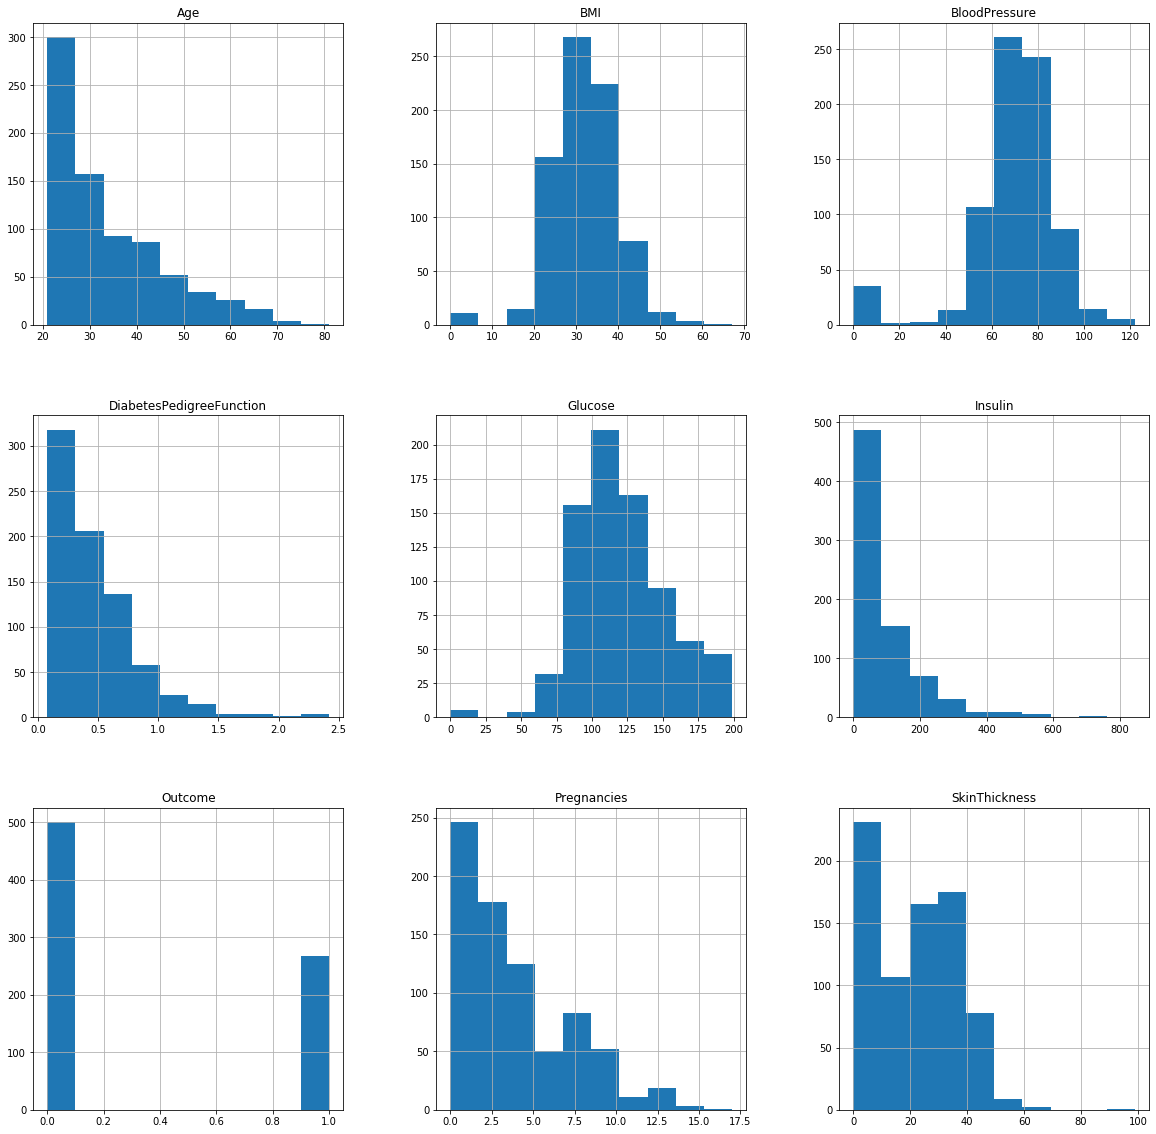

In [6]:
import seaborn as sns
p = diabetes.hist(figsize = (20,20))
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace = True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace = True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace = True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace = True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace = True)

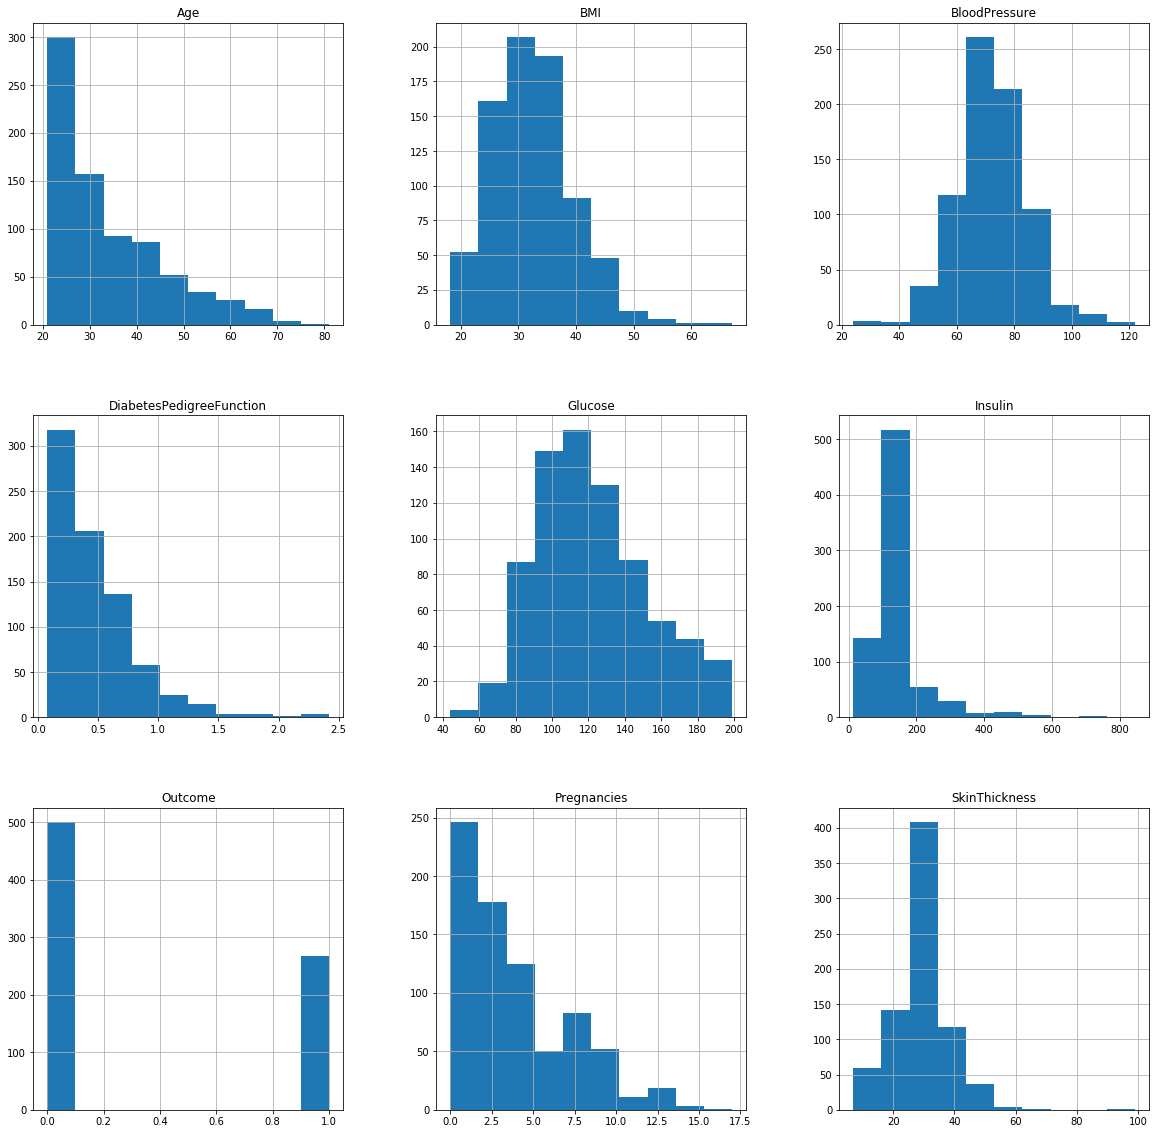

In [7]:
p = diabetes_copy.hist(figsize = (20,20))

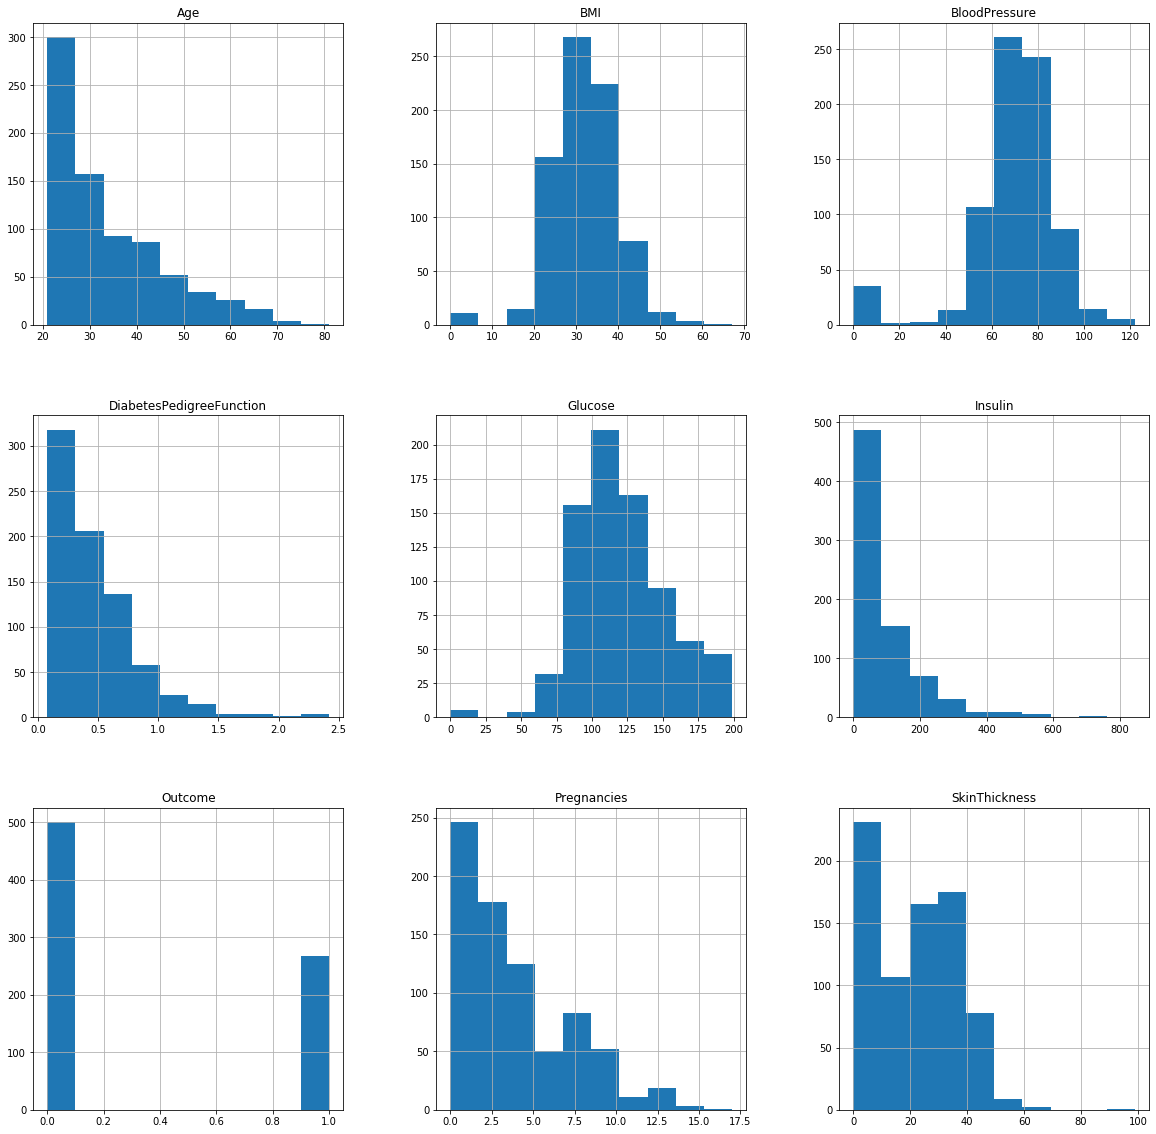

In [8]:
p = diabetes.hist(figsize = (20,20))

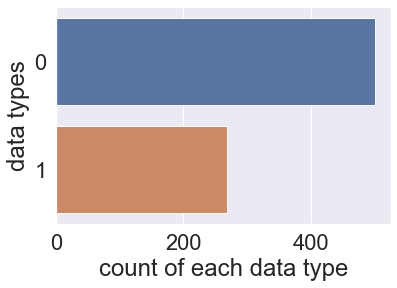

In [20]:
## data type analysis
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(5,5))
# sns.set(font_scale=2)
sns.countplot(y=y ,data=diabetes)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

In [12]:
! pip install missingo

  ERROR: Could not find a version that satisfies the requirement missingo (from versions: none)
ERROR: No matching distribution found for missingo


In [21]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes)

ModuleNotFoundError: No module named 'missingno'

0    500
1    268
Name: Outcome, dtype: int64


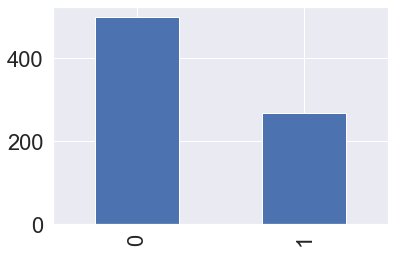

In [22]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")

In [25]:
import pandas as pd
# from pandas.tools.plotting import scatter_matrix
p=pd.scatter_matrix(diabetes_data,figsize=(25, 25))

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [2]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

NameError: name 'X' is not defined

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [26]:
from sklearn.neighbors import KNeighborsClassifier


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## scikit-learn 4-step modeling pattern

![steps](img/sklearnsteps.png)

**Step 1:** Import the class you plan to use

In [31]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

**Class specifications**
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [33]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [35]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [36]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.6979166666666666
F1: 0.546875


In [37]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[99 24]
 [34 35]]


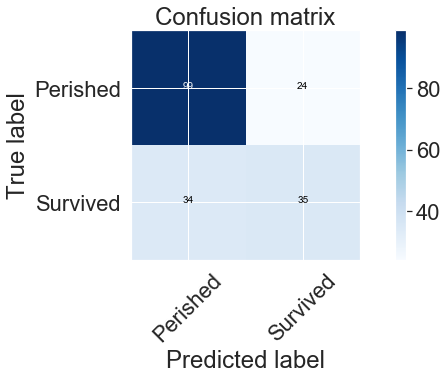

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for K

In [39]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [40]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.7916666666666666
F1: 0.6875


In [41]:
from sklearn.metrics import classification_report  

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       123
           1       0.75      0.64      0.69        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



Confusion Matrix, without normalization
[[108  15]
 [ 25  44]]


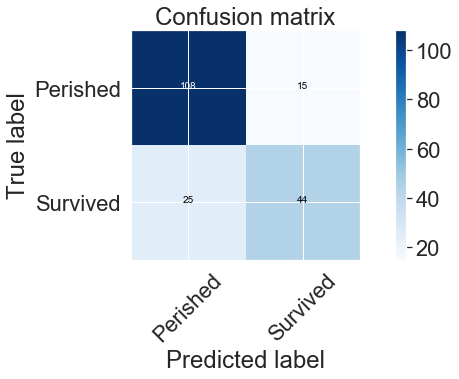

In [42]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Search for an optimal value of K for KNN


In [43]:
k_range = list(range(1, 4))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.6920166015625, 0.6460241759242397, 0.7272287644787645]


#### Visual comparison of different $K$s

This is not an ROC curve

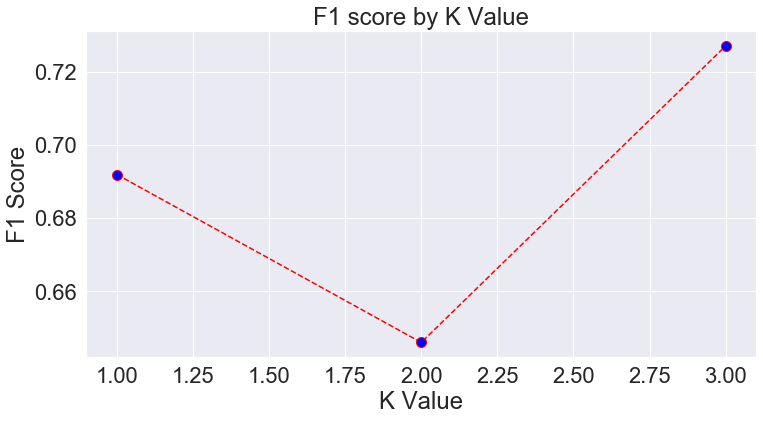

In [44]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

### What value of K performs best on our Test data?

Here we use F score, what other metrics could we use?

### How do you think K size relates to our concepts of bias and variance?

![alt text](img/K-NN_Neighborhood_Size_print.png)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)

In [ ]:
w